# Aula 5 - Alguns gráficos com Pandas

### Introdução

Gráficos são representações visuais dos dados, que buscam facilitar o entendimento dos mesmos. Podem ser muito úteis na identificação de variáveis importantes para uma modelagem ou tomada de decisão.


**Tipos de gráficos mais usuais:**
- **Scatter plot (ou gráfico de dispersão):**
Dadas duas variáveis X e Y, cada observação (par de valores (x,y)) é representado por um ponto no gráfico. Na imagem abaixo, uma observação (x,y) = (4,5) é representada pelo X vermelho.
<img src="images/img_scatterplot_editada.png" alt="Drawing" style="width: 500px;"/>

- **Gráfico de linhas:**
O gráfico de linhas é muito utilizado quando estamos querendo encontrar tendências de um conjunto de variáveis. No geral, a variável alocada no eixo horizontal representa categorias ordinais, geralmente temporais (como por exemplo: meses, anos, dias, semanas, lotes em ordem de fabricação etc). Para construí-lo, primeiro aplica-se um gráfico de dispersão dessas variáveis, e depois unem-se os pontos por linhas, como mostra a imagem abaixo. Podemos imaginar que cada categoria é um lote de produção de uma mercadoria (em que o lote 1 foi produzido antes do lote 2, e assim por diante), e no eixo vertical, têm se a quantidade vendida de cada lote. Ainda, há 3 séries representadas por cores, que podem representar, por exemplo, três clientes diferentes que adquiriram as mercadorias.
<img src="./images/grafico_linhas.jpg" alt="Drawing" style="width: 500px;"/>

- **Gráfico de pizza/Pie plot (ou gráfico de setores):**
Este gráfico tem como objetivo representar um valor relativo de cada categoria em relação a um todo. Exemplo: de todo o lucro de uma empresa revendedora de aparelhos celular, quantos porcento são relativos a cada marca de produto comercializado.
<img src="./images/grafico_pizza.png" alt="Drawing" style="width: 400px;"/>

- **Gráfico de barras (horizontal e vertical):**
Um gráfico de barras é uma forma de visualização de dados categóricos, em que cada categoria é representada por uma barra, cujo tamanho representa sua frequência/quantidade de observações. Pode ser representado de forma vertical (conhecido também como gráfico de colunas) ou de forma horizontal (em que o gráfico parece "deitado". No exemplo abaixo, o mesmo conjunto de dados é representado das duas formas. 

Observação: Aqui, os valores "1", "2" e "3" das barras representam categorias, e não uma variável contínua.
<img src="./images/grafico_barras.png" alt="Drawing" style="width: 500px;"/>

- **Histograma:** 
Um histograma é muito parecido com um gráfico de barras, e possui a mesma ideia: cada coluna representa uma frequência/quantidade. Entretanto, o eixo horizontal deste tipo de gráfico é uma variável contínua, e a ideia é observar a distribuição das observações desta variável. Exemplos de perguntas que podemos estar tentando responder ao analisar esse tipo de gráfico, são: "quais são os valores mais frequentes nessa variável contínua?" e "Qual a probabilidade de uma nova observação ter determinado valor?"

Para se construir as barras deste gráfico, a variável contínua é agrupada em intervalos, e o tamanho da barra representa o número de observações que possuem valores dentro deste intervalo. É comum encontrar histogramas com um traço linear ligando o topo dessas barras pelo meio, de forma a facilitar a identificação de uma distribuição estatística.
<img src="./images/histograma.png" alt="Drawing" style="width: 500px;"/>

- **Box-Plot:**
Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/>
<img src="./images/boxplot.png" alt="Drawing" style="width: 500px;"/>

## Gráficos com pandas

A biblioteca pandas, que estudamos no módulo passado, permite realizar alguns gráficos simples, baseados na biblioteca matplotlib. Vamos aprender a aplicá-los utilizando a base de dados das medições dos pinguins como exemplo.  

**Documentação:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("../data/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<img src="./images/culmen_depth.png" alt="Drawing" style="width: 350px;"/>
<img src="./images/fliper_lenght.jpg" alt="Drawing" style="width: 250px;"/>

In [10]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Gráfico de dispersão (scatter plot)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

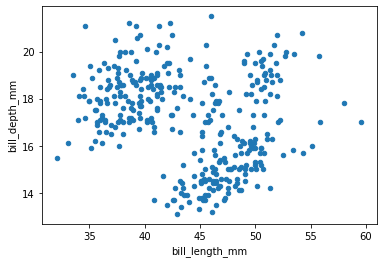

In [13]:
# Gráfico de dispersão entre a grossura do bico e o comprimento do bico

# df[["bill_length_mm", "bill_depth_mm"]]
df.plot(x = "bill_length_mm", y = "bill_depth_mm", kind = "scatter")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

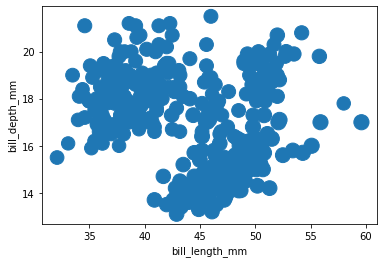

In [20]:
df.plot(x = "bill_length_mm", y = "bill_depth_mm", kind = "scatter", s = "flipper_length_mm")

#### Criando gráficos com filtros

In [26]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<AxesSubplot:title={'center':'Penguins femininos'}, xlabel='bill_length_mm', ylabel='bill_depth_mm'>

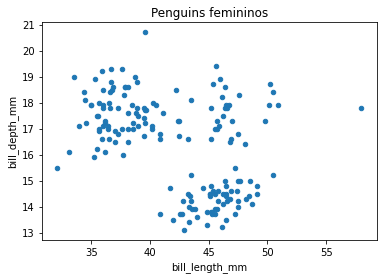

In [30]:
df[df["sex"] == 'FEMALE'].plot(x = "bill_length_mm", y = "bill_depth_mm", kind = "scatter", title = "Penguins femininos")

<AxesSubplot:title={'center':'Penguins Masculinos'}, xlabel='bill_length_mm', ylabel='bill_depth_mm'>

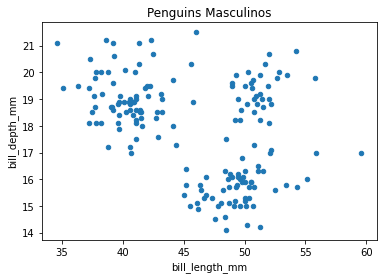

In [29]:
df[df["sex"] == 'MALE'].plot(x = "bill_length_mm", y = "bill_depth_mm", kind = "scatter", title = "Penguins Masculinos")

#### Unindo dois gráficos

<AxesSubplot:title={'center':'Comprimento x Grossura do bico'}, xlabel='Comprimento do bico', ylabel='Grossura do bico'>

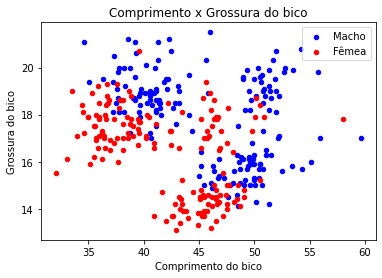

In [42]:
ax1 = df[df["sex"] == 'MALE'].plot(
    x = "bill_length_mm", 
    y = "bill_depth_mm", 
    kind = "scatter", 
    title = "Penguins Machos", 
    color = "blue",
    label = "Macho"
)


df[df["sex"] == 'FEMALE'].plot(
    x = "bill_length_mm", 
    y = "bill_depth_mm", 
    kind = "scatter", 
    title = "Comprimento x Grossura do bico", 
    ax = ax1, 
    color = "red",
    label = "Fêmea",
    xlabel = "Comprimento do bico",
    ylabel = "Grossura do bico"
)

## Gráfico de barras

In [43]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Quantidade' : np.random.randint(low=100, size=12),
                          'Veículo' : np.repeat(['HB20', 'Onix', 'Sandero'],4)})
df_vendas

,Mês,Quantidade,Veículo
0,Jan,66,HB20
1,Fev,57,HB20
2,Mar,99,HB20
3,Abr,86,HB20
4,Jan,24,Onix
5,Fev,79,Onix
6,Mar,93,Onix
7,Abr,53,Onix
8,Jan,16,Sandero
9,Fev,30,Sandero


In [46]:
df_vendas.groupby("Veículo").sum()

,Quantidade
Veículo,
HB20,308
Onix,249
Sandero,109


<AxesSubplot:xlabel='Veículo'>

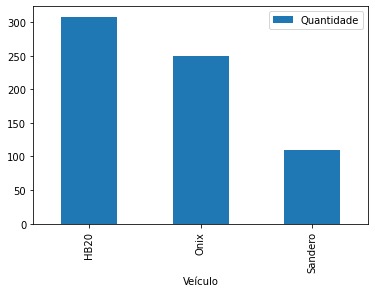

In [47]:
df_vendas.groupby("Veículo").sum().plot(kind = "bar")

<AxesSubplot:xlabel='Veículo'>

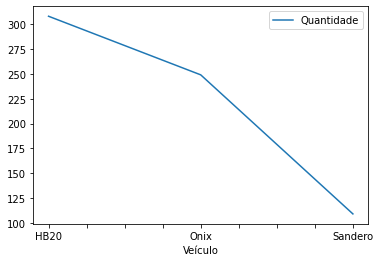

In [48]:
df_vendas.groupby("Veículo").sum().plot(kind = "line")

<AxesSubplot:title={'center':'Vendas por mês'}, xlabel='Mês', ylabel='quantidade'>

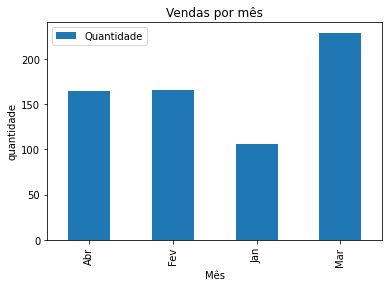

In [54]:
df_vendas.groupby("Mês").sum().plot(kind = "bar", title = "Vendas por mês", ylabel = "quantidade")

#### Subplots

#### Multiplotagem

#### Barras Horizontais

## Gráfico de linhas

Inverter o eixo X

## Gráfico de pizza